<a href="https://colab.research.google.com/github/brillync/AI/blob/main/clustering_auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [274]:
import pandas as pd

# Load the data
data = pd.read_csv('auto-mpg.csv')
# Display the first few rows
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [275]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [278]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [279]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


<Axes: >

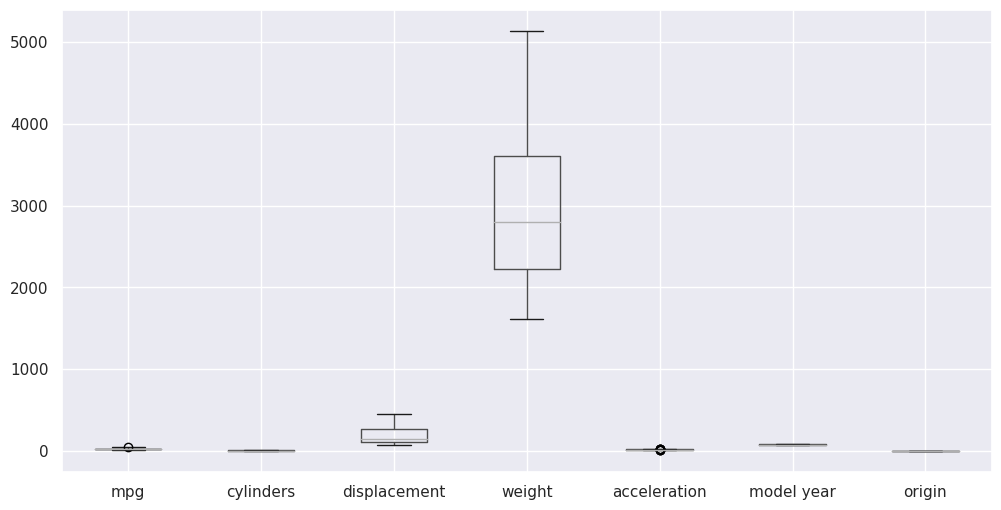

In [280]:
data.boxplot(figsize = (12,6))

In [281]:
#selecting the numeric columns
numeric_columns = data.select_dtypes(include = ['int64', 'float64'])

def outlier_detection(column):
    # calculating the quantiles for each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # calculating lower bound and upper bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(data)) * 100
        return column, percentage

In [282]:
columns_with_outliers = [outlier_detection(column) for column in numeric_columns.columns]
columns_with_outliers = [(column,percentage) for column, percentage in columns_with_outliers if column is not None]

In [283]:
for column, percentage in columns_with_outliers:
    print(f"Column Name : {column}, Percentage of outliers : {percentage:.2f}%")

Column Name : mpg, Percentage of outliers : 0.25%
Column Name : acceleration, Percentage of outliers : 1.76%


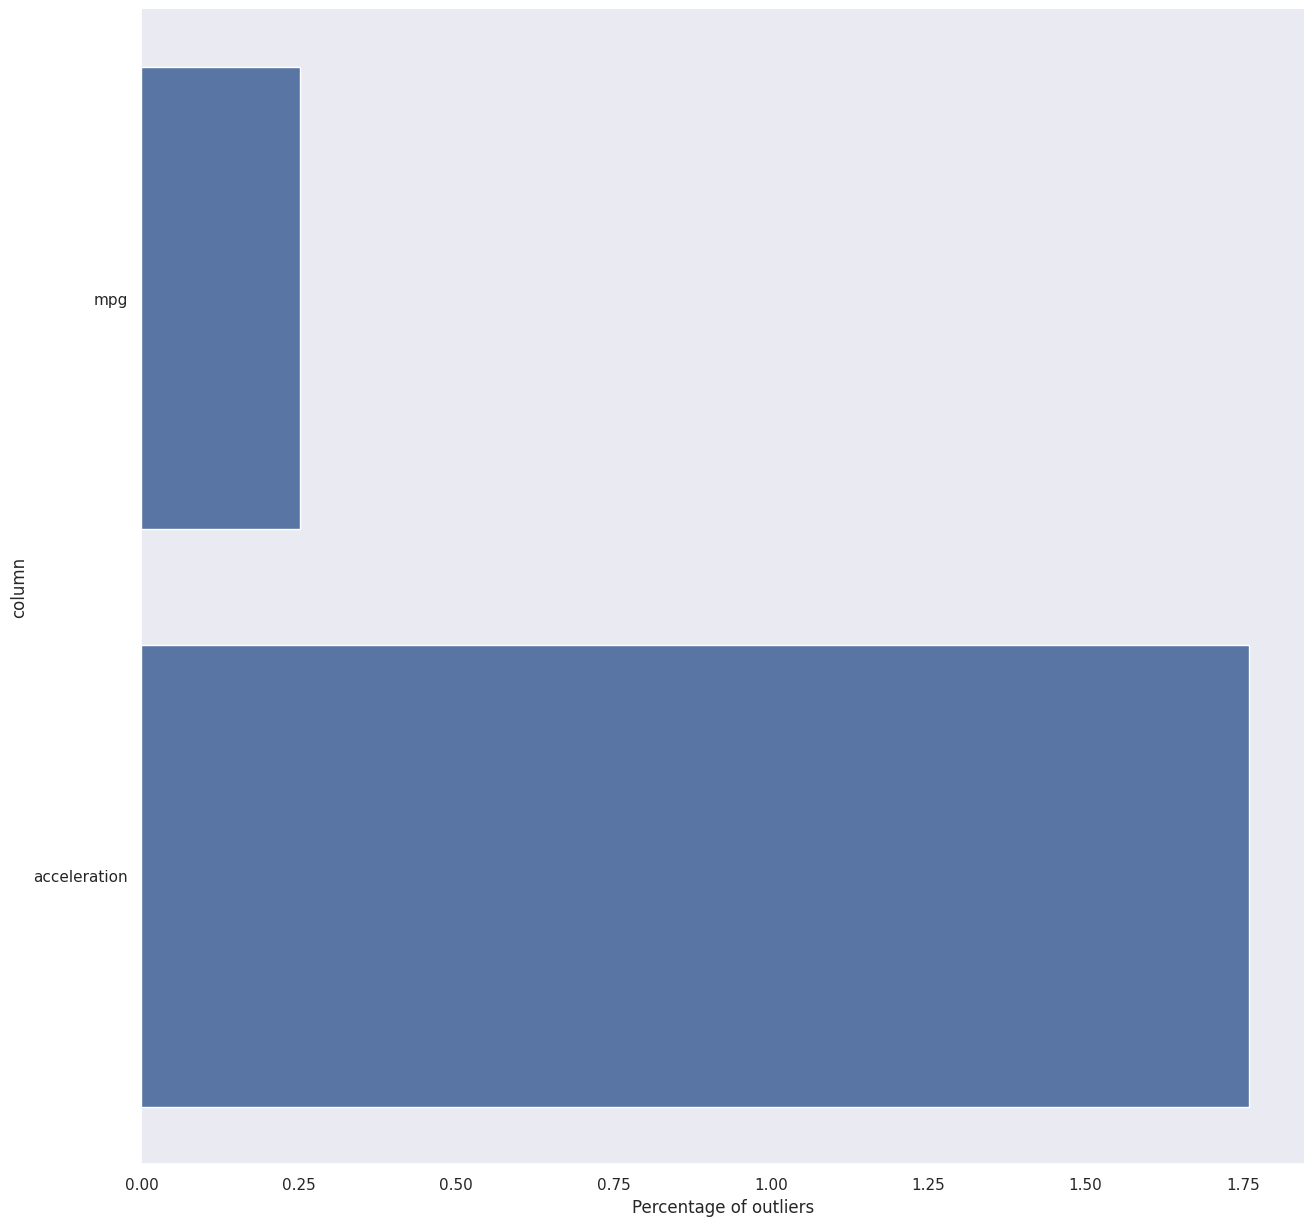

In [284]:
temp = pd.DataFrame(columns_with_outliers, columns = ['column', 'percentage'])

sns.set_style('dark')
sns.barplot(data = temp, y = 'column', x = 'percentage')
plt.xlabel("Percentage of outliers")
sns.despine()
plt.show()

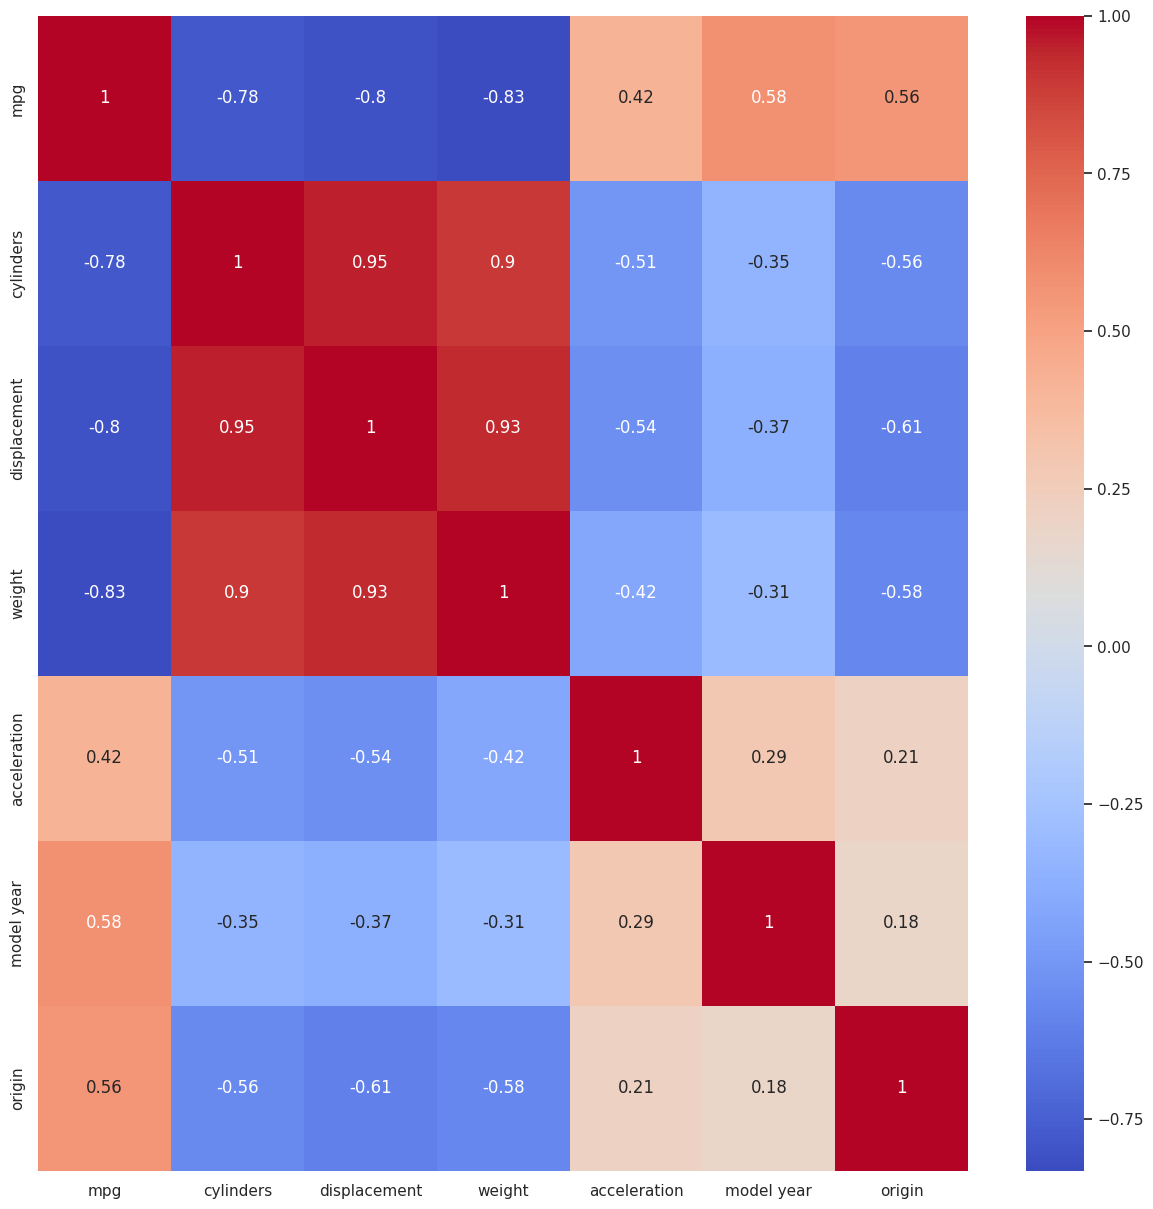

In [285]:
# multicollinearity check

corr_matrix = numeric_columns.corr()


sns.set_style('white')
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [287]:
# Calculate range, variance, and standard deviation for numerical columns
range_values = data[numerical_columns].max() - data[numerical_columns].min()
variance_values = data[numerical_columns].var()
std_deviation = data[numerical_columns].std()

print("\nRange of numerical columns:")
print(range_values)
print("\nVariance of numerical columns:")
print(variance_values)
print("\nStandard Deviation of numerical columns:")
print(std_deviation)


Range of numerical columns:
mpg               37.6
cylinders          5.0
displacement     387.0
weight          3527.0
acceleration      16.8
model year        12.0
origin             2.0
dtype: float64

Variance of numerical columns:
mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
dtype: float64

Standard Deviation of numerical columns:
mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64


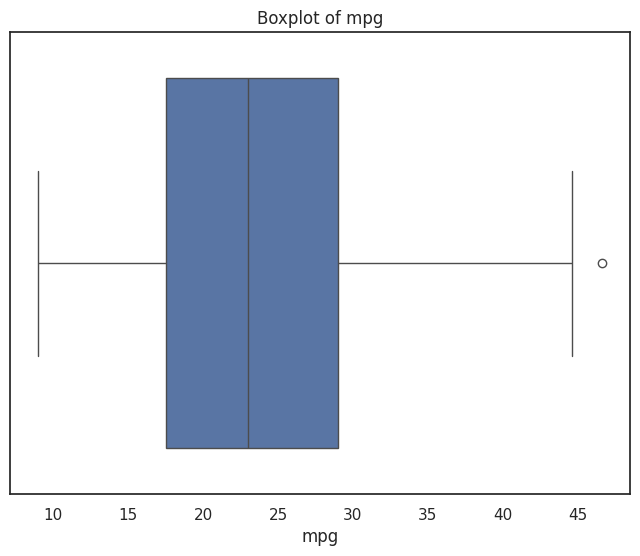

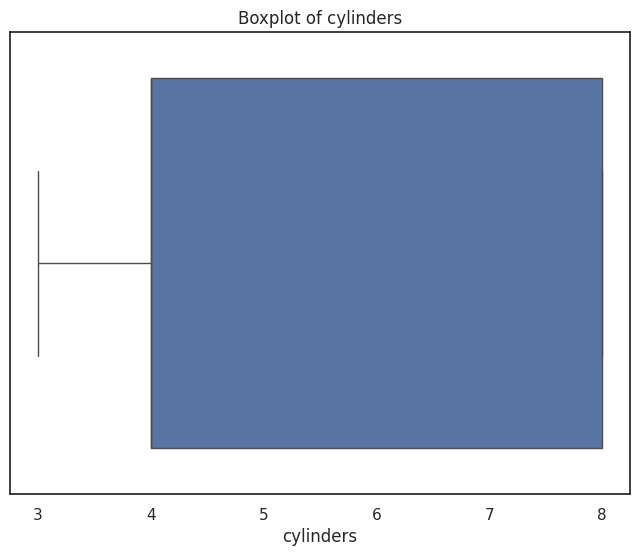

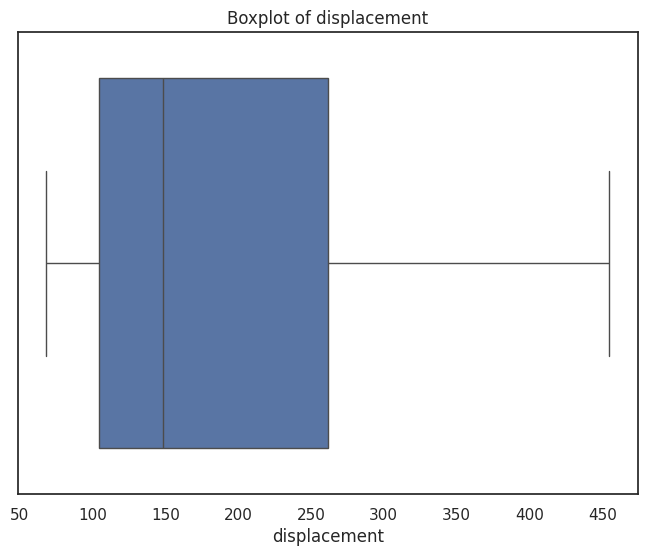

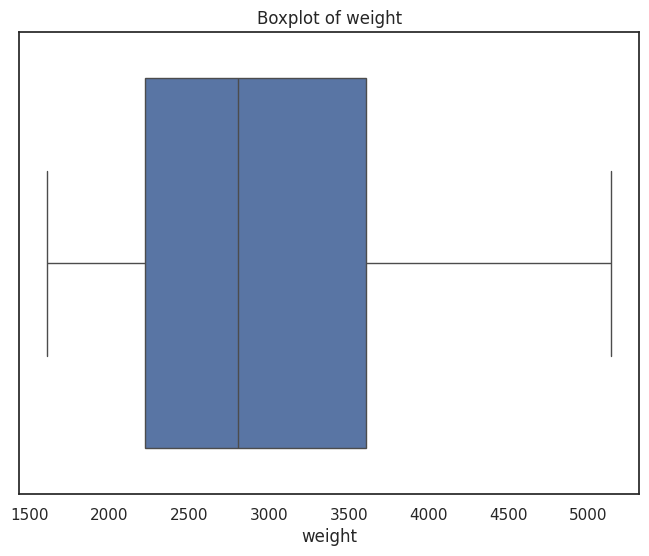

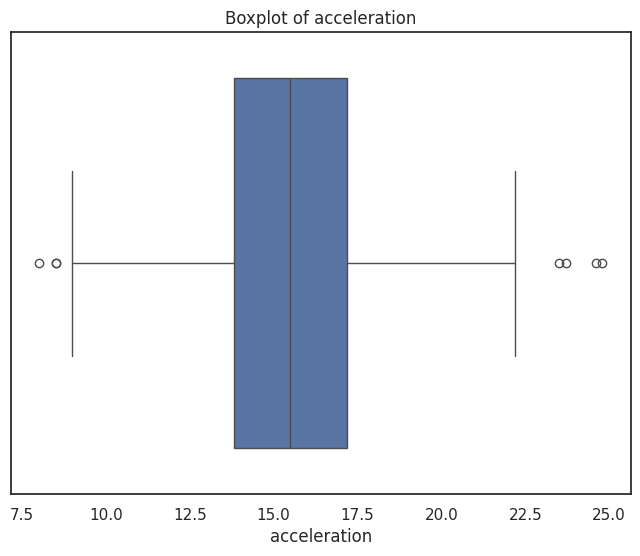

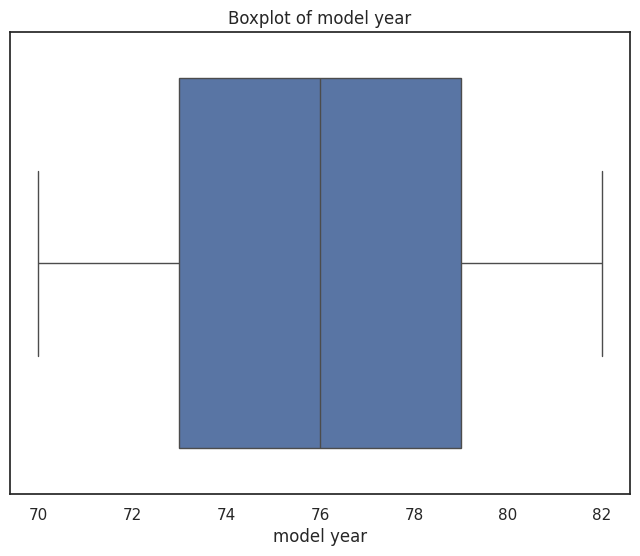

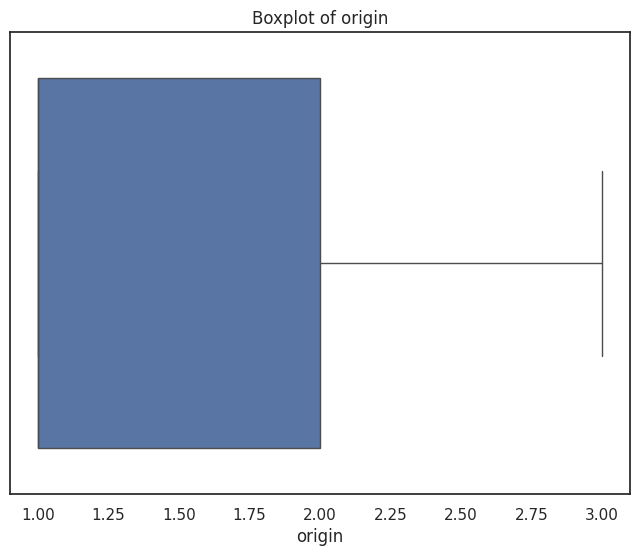

In [288]:
# Boxplots or other methods to identify outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [290]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [291]:
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of Duplicate Rows:", num_duplicates)

# Display duplicate rows
duplicate_data = data[duplicate_rows]
print("Duplicate Rows:")
print(duplicate_data)

Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


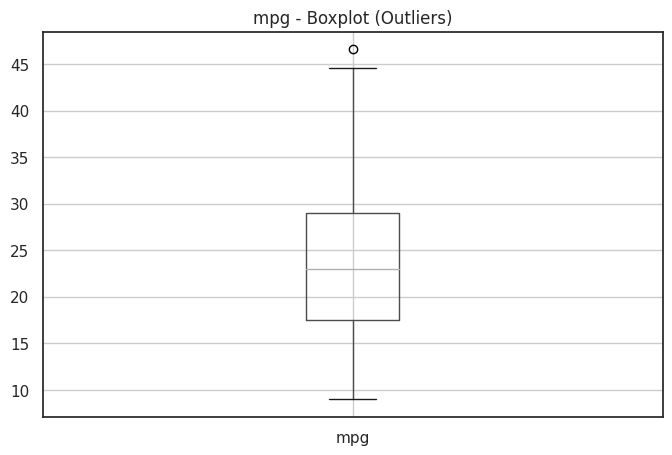

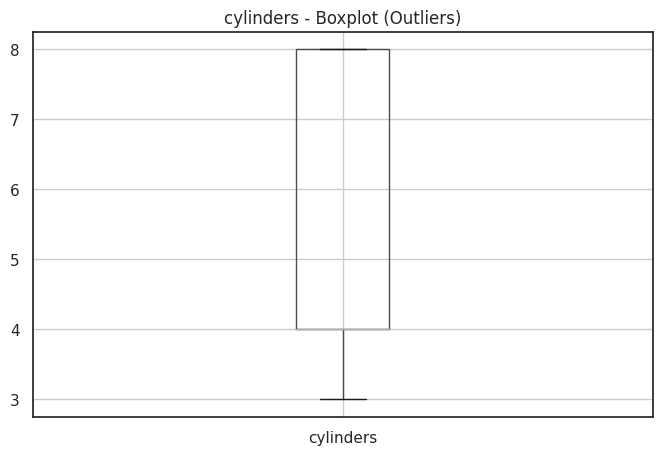

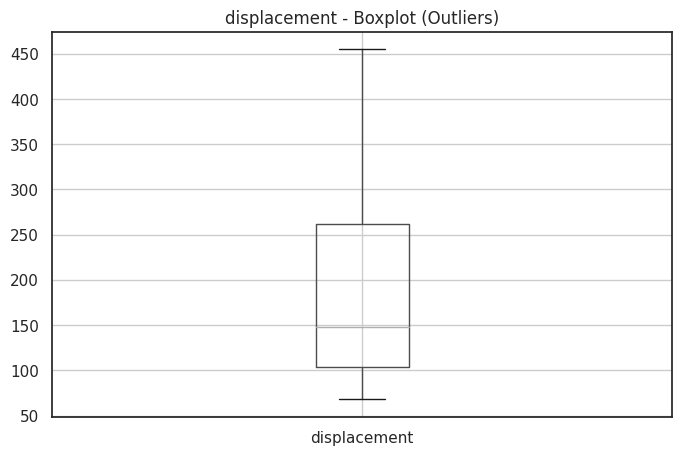

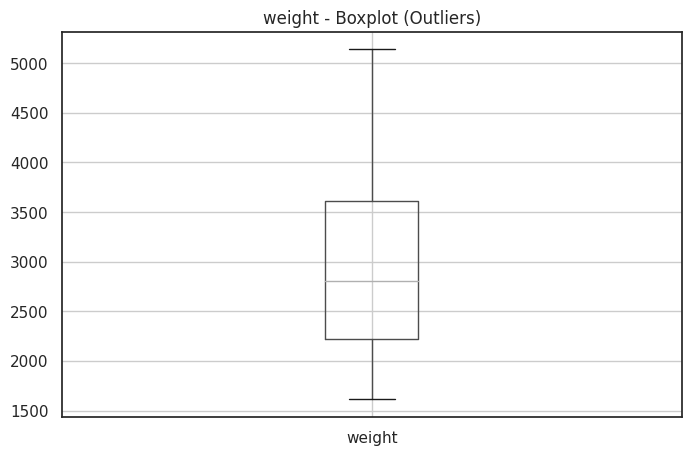

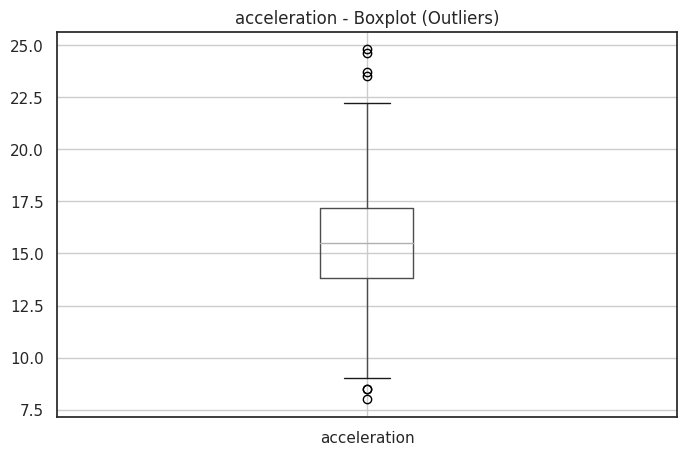

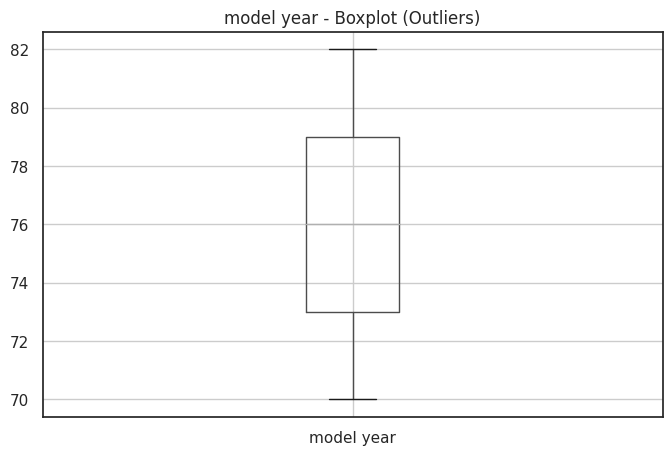

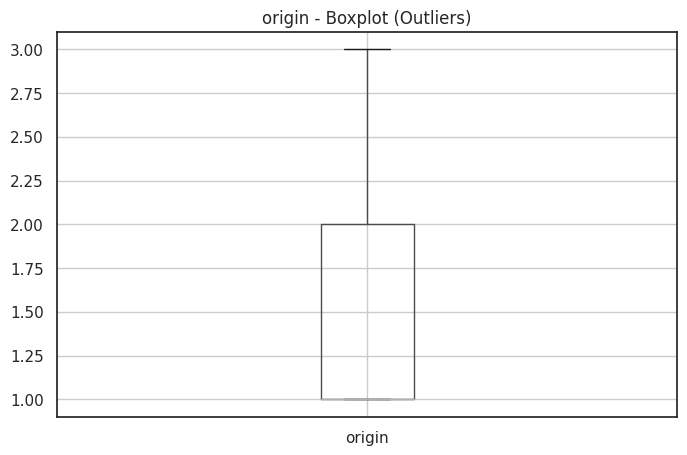

In [292]:
import matplotlib.pyplot as plt

# Create boxplots for numerical columns to visualize outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=col)
    plt.title(col + ' - Boxplot (Outliers)')
    plt.show()

In [293]:
def identify_outliers(data, columns, threshold=1.5):
    """
    Identify outliers in the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with rows flagged as outliers along with the column name and reason.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - outliers_df: DataFrame with flagged outliers and reasons
    """
    outliers_info = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Add information for each outlier row
        for index, row in outliers.iterrows():
            outlier_info = {
                'Value': row[col],
                'Column': col,
                'Reason': 'Below Lower Bound' if row[col] < lower_bound else 'Above Upper Bound'
            }
            outliers_info.append(outlier_info)

    # Create a new dataframe with outlier information
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Identify outliers in numerical columns using IQR and create dataframe with flag and reasons
outliers_df = identify_outliers(data, numerical_columns, threshold=1.5)

# Display the outliers dataframe
print("Outliers DataFrame:")
print(outliers_df.head())

# Save the outliers dataframe to a new CSV file (optional)
#outliers_df.to_csv('outliers_flagged.csv', index=False)


Outliers DataFrame:
   Value        Column             Reason
0   46.6           mpg  Above Upper Bound
1    8.5  acceleration  Below Lower Bound
2    8.5  acceleration  Below Lower Bound
3    8.0  acceleration  Below Lower Bound
4   23.5  acceleration  Above Upper Bound


In [294]:
def remove_outliers_iqr_with_report(data, columns, threshold=1.5):
    """
    Remove outliers from the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with removed outliers and returns it along with a report of removed rows.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - cleaned_data: DataFrame with outliers removed
        - removed_data: DataFrame containing removed rows
    """
    removed_rows = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Append the outliers to the removed_rows list
        removed_rows.extend(outliers.index.tolist())

    # Remove duplicate indices in the removed_rows list
    removed_rows = list(set(removed_rows))

    # Create a new dataframe with removed rows
    removed_data = data.loc[removed_rows]

    # Remove outliers from the original dataframe
    cleaned_data = data.drop(removed_rows)

    return cleaned_data, removed_data

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers from numerical columns using IQR and get removed rows
cleaned_data, removed_data = remove_outliers_iqr_with_report(data, numerical_columns, threshold=1.5)

# Display shape of original and cleaned data
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", cleaned_data.shape)

# Display the removed rows
print("\nRows Removed as Outliers:")
print(removed_data)


Original Data Shape: (398, 9)
Cleaned Data Shape: (390, 9)

Rows Removed as Outliers:
      mpg  cylinders  displacement horsepower  weight  acceleration  \
322  46.6          4          86.0         65    2110          17.9   
326  43.4          4          90.0         48    2335          23.7   
7    14.0          8         440.0        215    4312           8.5   
9    15.0          8         390.0        190    3850           8.5   
394  44.0          4          97.0         52    2130          24.6   
11   14.0          8         340.0        160    3609           8.0   
299  27.2          4         141.0         71    3190          24.8   
59   23.0          4          97.0         54    2254          23.5   

     model year  origin            car name  
322          80       3           mazda glc  
326          80       2  vw dasher (diesel)  
7            70       1   plymouth fury iii  
9            70       1  amc ambassador dpl  
394          82       2           vw pickup 

In [295]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [296]:
from sklearn.preprocessing import LabelEncoder

# Encode 'product quality' column
label_encoder = LabelEncoder()
data['car name'] = label_encoder.fit_transform(data['car name'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,231
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,153
394,44.0,4,97.0,52,2130,24.6,82,2,301
395,32.0,4,135.0,84,2295,11.6,82,1,119
396,28.0,4,120.0,79,2625,18.6,82,1,159


In [297]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data, columns):
    """
    Normalize the specified numerical columns in the DataFrame using Min-Max scaling.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to normalize

    Returns:
        - normalized_data: DataFrame with normalized columns
    """
    scaler = MinMaxScaler()
    data_normalized = data.copy()
    data_normalized[columns] = scaler.fit_transform(data_normalized[columns])

    return data_normalized

# List of numerical columns to normalize
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns using Min-Max scaling
normalized_data = normalize_data(data, numerical_columns)

# Display the first few rows of normalized data
print("Normalized Data:")
print(normalized_data.head())

# Save the normalized data to a new CSV file (optional)
#normalized_data.to_csv('normalized_machine_failure_data.csv', index=False)
normalized_data

Normalized Data:
        mpg  cylinders  displacement horsepower    weight  acceleration  \
0  0.239362        1.0      0.617571        130  0.536150      0.238095   
1  0.159574        1.0      0.728682        165  0.589736      0.208333   
2  0.239362        1.0      0.645995        150  0.516870      0.178571   
3  0.186170        1.0      0.609819        150  0.516019      0.238095   
4  0.212766        1.0      0.604651        140  0.520556      0.148810   

   model year  origin  car name  
0         0.0     0.0  0.161184  
1         0.0     0.0  0.118421  
2         0.0     0.0  0.759868  
3         0.0     0.0  0.046053  
4         0.0     0.0  0.529605  


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,1.0,0.617571,130,0.536150,0.238095,0.0,0.0,0.161184
1,0.159574,1.0,0.728682,165,0.589736,0.208333,0.0,0.0,0.118421
2,0.239362,1.0,0.645995,150,0.516870,0.178571,0.0,0.0,0.759868
3,0.186170,1.0,0.609819,150,0.516019,0.238095,0.0,0.0,0.046053
4,0.212766,1.0,0.604651,140,0.520556,0.148810,0.0,0.0,0.529605
...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,86,0.333711,0.452381,1.0,0.0,0.503289
394,0.930851,0.2,0.074935,52,0.146583,0.988095,1.0,0.5,0.990132
395,0.611702,0.2,0.173127,84,0.193365,0.214286,1.0,0.0,0.391447
396,0.505319,0.2,0.134367,79,0.286929,0.630952,1.0,0.0,0.523026


In [307]:
data = pd.get_dummies(data, columns=['car name'])


In [309]:
# Model Training
X = data.drop(['mpg', 'horsepower'], axis=1)
y = data['horsepower']


In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the normalized data
#normalized_data = pd.read_csv('auto-mpg.csv')

# Split the data into features (X) and target (y)
X = normalized_data.drop('origin', axis=1)
y = normalized_data['origin']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (278, 8) (278,)
Validation set shape: (40, 8) (40,)
Testing set shape: (80, 8) (80,)


In [310]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [312]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Evaluation
y_numeric = pd.factorize(y)[0]  # Convert string labels to numeric labels
y_pred = kmeans.predict(X)
print("Classification Report:")
print(classification_report(y_numeric, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_numeric, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_numeric, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.20      0.02         5
           1       0.00      0.00      0.00         4
           2       0.19      0.77      0.31        22
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        19
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [313]:
# Model Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:

# Model Training
model = KMeans(n_clusters=3)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [316]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Evaluation
y_numeric_test = pd.factorize(y_test)[0]  # Convert string labels to numeric labels
y_pred_test = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_numeric_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_numeric_test, y_pred_test))
print("\nAccuracy Score:")
print(accuracy_score(y_numeric_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.03      1.00      0.05         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
